In [72]:
import numpy as np
import pandas as pd

In [73]:
data=pd.read_csv('Petrol_Gas_Prices_Worldwide.csv', encoding='latin-1')
data

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8
...,...,...,...,...,...,...,...,...,...,...,...
176,177,Belize,"4,001",0%,166.5,6.68,1.76,373.09,"4,436",664,4
177,178,Niue,51,0%,484.4,11.43,3.02,638.73,"15,586","1,364",3
178,179,Saint Pierre & Miquelon,660,0%,1705.1,8.27,2.19,462.13,"34,900","4,220",2
179,180,Montserrat,400,0%,1231.1,4.57,1.21,255.07,"12,589","2,755",2


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   S#                                    181 non-null    int64  
 1   Country                               181 non-null    object 
 2   Daily Oil Consumption (Barrels)       181 non-null    object 
 3   World Share                           181 non-null    object 
 4   Yearly Gallons Per Capita             181 non-null    float64
 5   Price Per Gallon (USD)                181 non-null    float64
 6   Price Per Liter (USD)                 181 non-null    float64
 7   Price Per Liter (PKR)                 181 non-null    float64
 8   GDP Per Capita ( USD )                181 non-null    object 
 9   Gallons GDP Per Capita Can Buy        181 non-null    object 
 10  xTimes Yearly Gallons Per Capita Buy  181 non-null    int64  
dtypes: float64(4), int6

In [75]:
data.isnull().sum()

S#                                      0
Country                                 0
Daily Oil Consumption (Barrels)         0
World Share                             0
Yearly Gallons Per Capita               0
Price Per Gallon (USD)                  0
Price Per Liter (USD)                   0
Price Per Liter (PKR)                   0
GDP Per Capita ( USD )                  0
Gallons GDP Per Capita Can Buy          0
xTimes Yearly Gallons Per Capita Buy    0
dtype: int64

In [76]:
data.drop('S#',inplace =True , axis=1)
data.columns

Index(['Country', 'Daily Oil Consumption (Barrels)', 'World Share',
       'Yearly Gallons Per Capita', 'Price Per Gallon (USD)',
       'Price Per Liter (USD)', 'Price Per Liter (PKR)',
       'GDP Per Capita ( USD )', 'Gallons GDP Per Capita Can Buy',
       'xTimes Yearly Gallons Per Capita Buy'],
      dtype='object')

CONVERT DATA TYPE FROM STRING TO FLOAT

In [77]:
data['Daily Oil Consumption (Barrels)']=data['Daily Oil Consumption (Barrels)'].apply(lambda x: x.replace(',',''))
data['Daily Oil Consumption (Barrels)']=data['Daily Oil Consumption (Barrels)'].astype(float)

In [78]:
data['GDP Per Capita ( USD )']=data['GDP Per Capita ( USD )'].apply(lambda x: x.replace(',',''))
data['GDP Per Capita ( USD )']=data['GDP Per Capita ( USD )'].astype(float)

In [79]:
data['Gallons GDP Per Capita Can Buy']=data['Gallons GDP Per Capita Can Buy'].apply(lambda x: x.replace(',',''))
data['Gallons GDP Per Capita Can Buy']=data['Gallons GDP Per Capita Can Buy'].astype(float)

In [80]:
Total_Consumption=data['Daily Oil Consumption (Barrels)'].sum()
data['World Share']=(data['Daily Oil Consumption (Barrels)']/Total_Consumption)*100

DATA ANALYSIS

COUNTRIES WITH MOST AND LEAST DAILY OIL CONSUMPTION

In [81]:
Countries=data.groupby('Country')
Countries
len(Countries)

181

In [82]:
Countries['Daily Oil Consumption (Barrels)'].sum().sort_values(ascending=False)

Country
United States              19687287.0
China                      12791553.0
India                       4443000.0
Japan                       4012877.0
Russia                      3631287.0
                              ...    
Saint Pierre & Miquelon         660.0
Kiribati                        400.0
Montserrat                      400.0
Saint Helena                     70.0
Niue                             51.0
Name: Daily Oil Consumption (Barrels), Length: 181, dtype: float64

In [83]:
Countries['Daily Oil Consumption (Barrels)'].sum().sort_values(ascending=True)

Country
Niue                             51.0
Saint Helena                     70.0
Kiribati                        400.0
Montserrat                      400.0
Saint Pierre & Miquelon         660.0
                              ...    
Russia                      3631287.0
Japan                       4012877.0
India                       4443000.0
China                      12791553.0
United States              19687287.0
Name: Daily Oil Consumption (Barrels), Length: 181, dtype: float64

COUNTRIES AND THEIR WORLD SHARE

In [84]:
Countries['World Share'].sum().sort_values(ascending=True)

Country
Niue                        0.000053
Saint Helena                0.000072
Kiribati                    0.000414
Montserrat                  0.000414
Saint Pierre & Miquelon     0.000683
                             ...    
Russia                      3.760002
Japan                       4.155118
India                       4.600487
China                      13.244965
United States              20.385127
Name: World Share, Length: 181, dtype: float64

In [85]:
Countries['World Share'].sum().sort_values(ascending=False)

Country
United States              20.385127
China                      13.244965
India                       4.600487
Japan                       4.155118
Russia                      3.760002
                             ...    
Saint Pierre & Miquelon     0.000683
Kiribati                    0.000414
Montserrat                  0.000414
Saint Helena                0.000072
Niue                        0.000053
Name: World Share, Length: 181, dtype: float64

DATA ANALYSIS USING VISUALIZATION TECHNIQUES:

HEATMAP:

<AxesSubplot:>

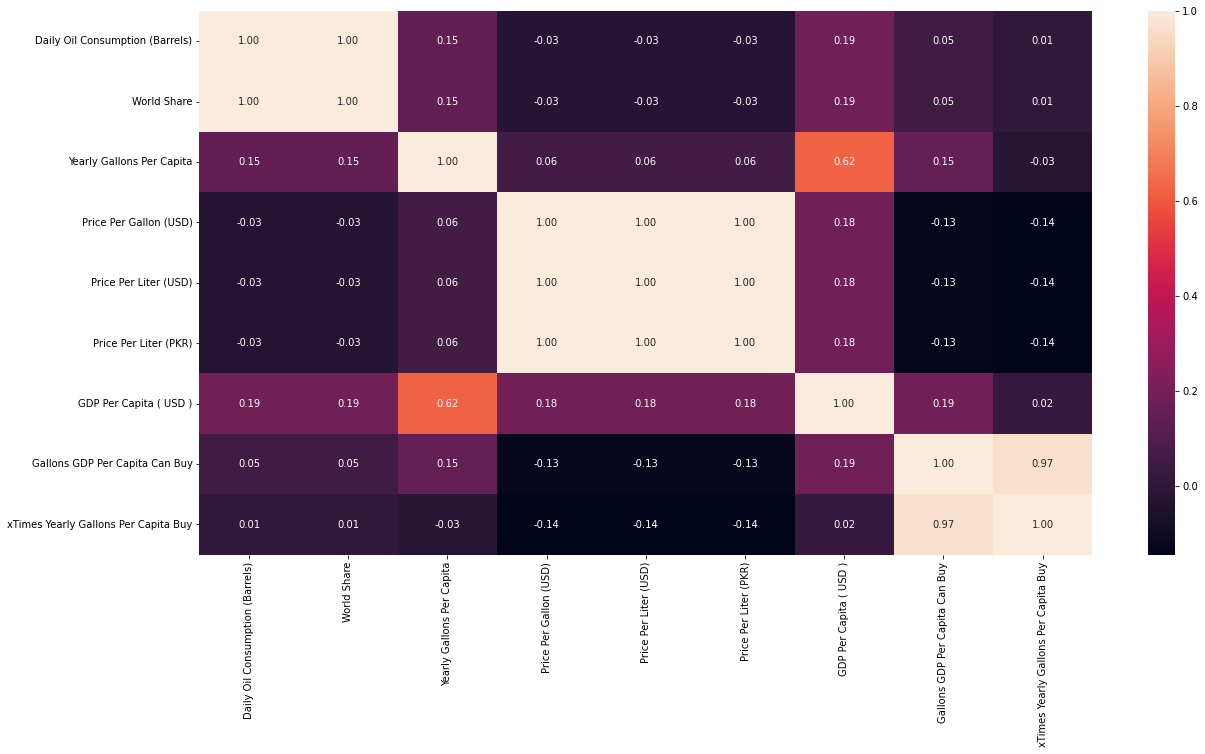

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

PERCENTAGE OF DAILY OIL CONSUMPTION OF TOP 5 COUNTRIES:

In [87]:

top_5_countries = data.nlargest(5, 'Daily Oil Consumption (Barrels)')
top_5_countries.head()

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,United States,19687287.0,20.385127,934.3,5.19,1.37,289.97,63414.0,12218.0,13
1,China,12791553.0,13.244965,138.7,5.42,1.43,302.87,10435.0,1925.0,14
2,India,4443000.0,4.600487,51.4,5.05,1.33,281.93,1901.0,376.0,7
3,Japan,4012877.0,4.155118,481.5,4.69,1.24,262.05,40193.0,8570.0,18
4,Russia,3631287.0,3.760002,383.2,3.41,0.90,190.56,10127.0,2970.0,8


In [89]:
pip install plotly


  Using cached plotly-5.11.0-py2.py3-none-any.whl (15.3 MB)
  Using cached tenacity-8.1.0-py3-none-any.whl (23 kB)


You should consider upgrading via the 'c:\Users\Rizwan computer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [93]:
pip install plotly_express==0.4. 0

Note: you may need to restart the kernel to use updated packages.Collecting plotly_express==0.4.
  Using cached plotly_express-0.4.0-py2.py3-none-any.whl (2.1 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
     ---------------------------------------- 9.1/9.1 MB 524.2 kB/s eta 0:00:00



You should consider upgrading via the 'c:\Users\Rizwan computer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [97]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.Collecting nbformat
     -------------------------------------- 77.1/77.1 KB 388.7 kB/s eta 0:00:00
     -------------------------------------- 90.2/90.2 KB 509.4 kB/s eta 0:00:00
     -------------------------------------- 62.8/62.8 KB 565.1 kB/s eta 0:00:00



You should consider upgrading via the 'c:\Users\Rizwan computer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [96]:
import plotly.express as px
fig=px.pie(top_5_countries.head(5),values='Daily Oil Consumption (Barrels)',names='Country',hole=0.425, color='Country')
#fig.update_layout(title='Daily Oil Consumption (Barrels )- Top 10 Countries',font_size=15,title_x=0.45,annotations=[dict(text='OC(Barrels)',font_size=18, showarrow=False,height=800,width=700)])
#fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed